# Fig 5
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.ioff()

In [2]:
df = pd.read_csv("/Volumes/DuncanSSD/20240628/data_analysis/lid_traversal.csv")

In [ ]:
# scale kcat by mutant scaling factor
df["kcat_mean_normed"] = df["kcat_mean_filtered"] * 0.089268643

In [4]:
gs_df = df[df["id"].str.contains("gsADK")].copy()
gs_df.loc[len(gs_df.index)] = ['gsADK_HCCT'] + [np.nan]*len(gs_df.columns[1:])
gs_df.loc[len(gs_df.index)] = ['gsADK_CCDT'] + [np.nan]*len(gs_df.columns[1:])

In [5]:
gs_ec_lid = 101.7034196
# create a color map for kcat_mean_filtered using viridis
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(gs_df["kcat_mean_normed"].min(), gs_ec_lid)#gs_df["kcat_mean_normed"].max())
gs_df["color"] = [cmap(norm(i)) for i in gs_df["kcat_mean_normed"]]

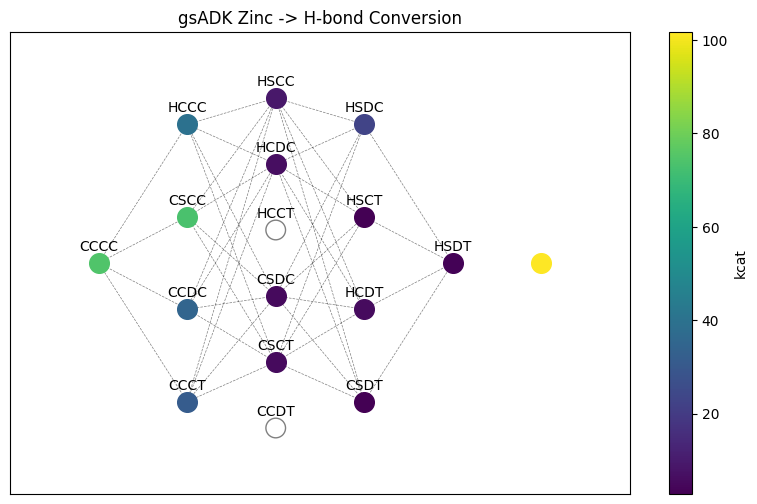

In [6]:
# set x_coord in gs_df to = number of C's in id
gs_df["x_coord"] = gs_df["id"].str.count("C")


# sort gs_df by id alphabetically
gs_df = gs_df.sort_values(by="id")

# do scatter plot in 2D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
MAX_DIM = 5
for x_coord, subset in gs_df.groupby("x_coord"):
    spacing =  MAX_DIM/(len(subset)+1)
    y_coord = 0
    
    for i, row in subset.iterrows():
        y_coord += spacing
        
        # set y_coord in gs_df 
        gs_df.loc[i, "y_coord"] = y_coord
   
#gs_df["x_coord"] = gs_df["x_coord"] * -1            

# add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# label color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('kcat')

# set x and y limits
ax.set_xlim(MAX_DIM,-2)
ax.set_ylim(0, MAX_DIM)

# hide ticks and tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

for i in range(max(gs_df["x_coord"])):
    # draw a line between each node in x_coord = i and x_coord = i+1
    i_subset = gs_df[gs_df["x_coord"] == i]
    i1_subset = gs_df[gs_df["x_coord"] == i+1]
    for i_row in i_subset.iterrows():
        for i1_row in i1_subset.iterrows():
            if not(np.isnan(i1_row[1]["kcat_mean_normed"]) or np.isnan(i_row[1]["kcat_mean_normed"])):
                ax.plot([i, i+1], [i_row[1]["y_coord"], i1_row[1]["y_coord"]], color="black", linestyle="--",
                        linewidth=0.5, alpha=0.5)

for i, row in gs_df.iterrows():
    # if kcat_mean_filtered is nan, draw an X
    ax.text(row["x_coord"], row["y_coord"]+.1, row["id"].split("_")[-1], color='black',  fontsize=10, ha='center', va='bottom')
    # if row["id"] in ["gsADK_CCCT", "gsADK_CCDT"]:
    #     ax.scatter(row["x_coord"], row["y_coord"], marker="x", color="r", s=200, zorder=3)
    if np.isnan(row["kcat_mean_normed"]):
        # draw an X on the xy plane
        ax.scatter(row["x_coord"], row["y_coord"],  facecolors='none', edgecolors="grey", s=200, zorder=3)

    else:
        ax.scatter(row["x_coord"], row["y_coord"],  color=row["color"], s=200, zorder=3)

#ax.scatter(row["x_coord"], row["y_coord"],  facecolors='none', edgecolors="grey", s=200, zorder=3)

ax.scatter(-1, 2.5,  color=cmap(norm(gs_ec_lid)), s=200, zorder=3)

plt.title("gsADK Zinc -> H-bond Conversion")
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("/Users/duncanmuir/Downloads/gs_lid_conversion.pdf")

In [7]:
ec_df = df[df["id"].str.contains("ecADK")].copy()


In [8]:
ec_gs_lid = 9.98332075

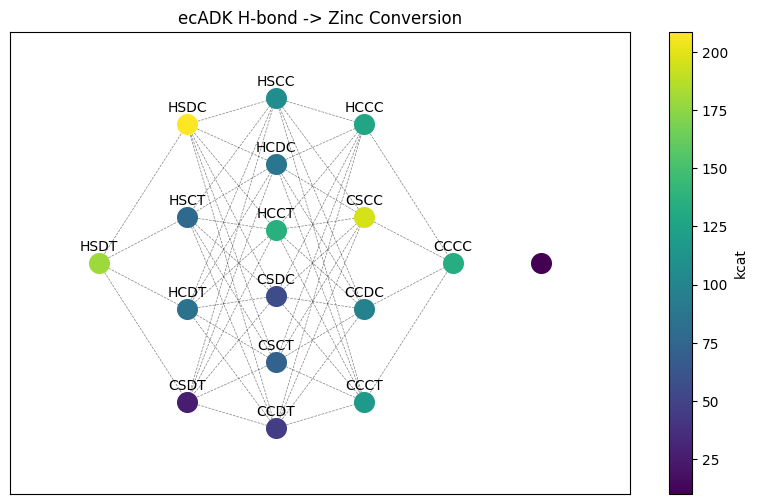

In [9]:
# set kcat_mean_filtered >1000 to nan
#ec_df.loc[ec_df["kcat_mean_filtered"] > 1000, "kcat_mean
ec_df["x_coord"] = ec_df["id"].str.count("C")
norm = plt.Normalize(ec_gs_lid, ec_df["kcat_mean_normed"].max())

ec_df["color"] = [cmap(norm(i)) for i in ec_df["kcat_mean_normed"]]
ec_df = ec_df.sort_values(by="id")

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
MAX_DIM = 5
for x_coord, subset in ec_df.groupby("x_coord"):
    spacing =  MAX_DIM/(len(subset)+1)
    y_coord = 0
    
    for i, row in subset.iterrows():
        y_coord += spacing
        
        # set y_coord in gs_df 
        ec_df.loc[i, "y_coord"] = y_coord

# add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# label color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('kcat')

# set x and y limits
# ax.set_xlim(MAX_DIM+1,-1)
ax.set_ylim(0, MAX_DIM)
ax.set_xlim(-1, MAX_DIM+1)

# hide ticks and tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

for i in range(max(ec_df["x_coord"])):
    # draw a line between each node in x_coord = i and x_coord = i+1
    i_subset = ec_df[ec_df["x_coord"] == i]
    i1_subset = ec_df[ec_df["x_coord"] == i+1]
    for i_row in i_subset.iterrows():
        for i1_row in i1_subset.iterrows():
            if not(np.isnan(i1_row[1]["kcat_mean_normed"]) or np.isnan(i_row[1]["kcat_mean_normed"])):
                ax.plot([i, i+1], [i_row[1]["y_coord"], i1_row[1]["y_coord"]], color="black", linestyle="--",
                        linewidth=0.5, alpha=0.5)
                
for i, row in ec_df.iterrows():

    # if kcat_mean_filtered is nan, draw an X
    ax.text(row["x_coord"], row["y_coord"]+.1, row["id"].split("_")[-1], color='black',  fontsize=10, ha='center', va='bottom')
    if np.isnan(row["kcat_mean_normed"]):
        # draw an X on the xy plane
        ax.scatter(row["x_coord"], row["y_coord"],  facecolors='none', edgecolors="grey", s=200, zorder=3)
    else:
        ax.scatter(row["x_coord"], row["y_coord"],  color=row["color"], s=200, zorder=3)

ax.scatter(5, 2.5,  color=cmap(norm(ec_gs_lid)), s=200, zorder=3)

plt.title("ecADK H-bond -> Zinc Conversion")
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("/Users/duncanmuir/Downloads/ec_lid_conversion.pdf")

## Fig 6C
___


In [13]:
chimera_consensus = pd.read_csv("../data/20240821_lid_chimera_consensus_mutants.csv")
chimera_consensus["id"] = chimera_consensus["id"].str.lower()

In [72]:
o_acum_subset = chimera_consensus[chimera_consensus["id"].str.contains("o_acum")].copy().reset_index(drop=True)

In [73]:
o_acum_subset["lid_name"] = o_acum_subset["id"].str[-6:]
# set rows to nan if Km_mean_filtered is < 35 or > 2000
o_acum_subset.loc[o_acum_subset["Km_mean_filtered"] < 35, ["kcat_mean_normed","Km_mean_filtered"]] = np.nan

o_acum_subset.loc[o_acum_subset["Km_mean_filtered"] > 2000, ["kcat_mean_normed","Km_mean_filtered"]] = np.nan

# add row for o_acum_WT
o_acum_subset.loc[len(o_acum_subset.index)] = ['o_acum_WT'] + [np.nan]*len(o_acum_subset.columns[1:])

# set o_acum_WT lid_name to WT
o_acum_subset.loc[o_acum_subset["id"] == "o_acum_WT", "lid_name"] = "WT"

# set ocum_WT kcat_mean_normed and Km_mean_filtered to 0
o_acum_subset.loc[o_acum_subset["id"] == "o_acum_WT", ["kcat_mean_normed", "Km_mean_filtered"]] = 0



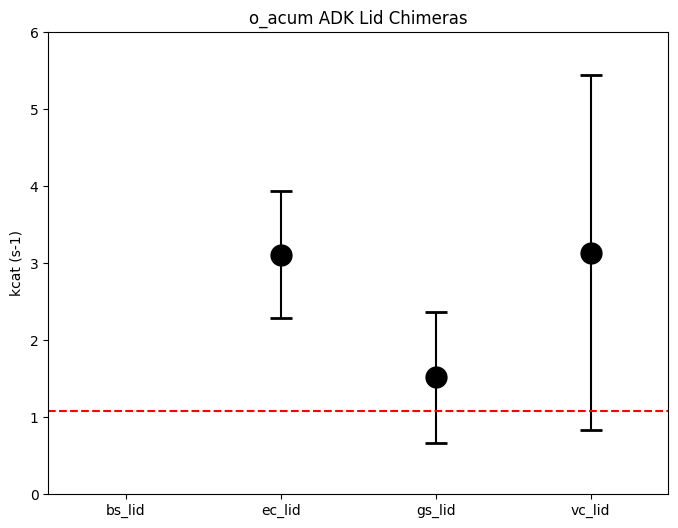

In [87]:
# d_dese plot
y_key = "kcat_mean_normed"
y_err_key = "kcat_stdev_normed"

fig, ax = plt.subplots(figsize=(8, 6))
x_pos = np.arange(len(o_acum_subset[o_acum_subset["lid_name"] != "WT"]))
for i, row in o_acum_subset[o_acum_subset["lid_name"] != "WT"].iterrows():

    ax.errorbar(x_pos[i], row[y_key], yerr=row[y_err_key], fmt='o', color='black', capsize=8, capthick=2, markersize=15)
ax.axhline(y=1.08, # slowest measured wt kcat
            color='r', linestyle='--')
ax.set_xticks(x_pos)
ax.set_xticklabels(o_acum_subset[o_acum_subset["lid_name"] != "WT"]["lid_name"])
ax.set_ylabel("kcat (s-1)")
ax.set_title("o_acum ADK Lid Chimeras")
ax.set_xlim(-0.5, len(x_pos)-0.5)
ax.set_ylim(0,6)
plt.rcParams['pdf.fonttype'] = 42
#plt.savefig("../data/fig_pdfs/o_acum_chimera.pdf")

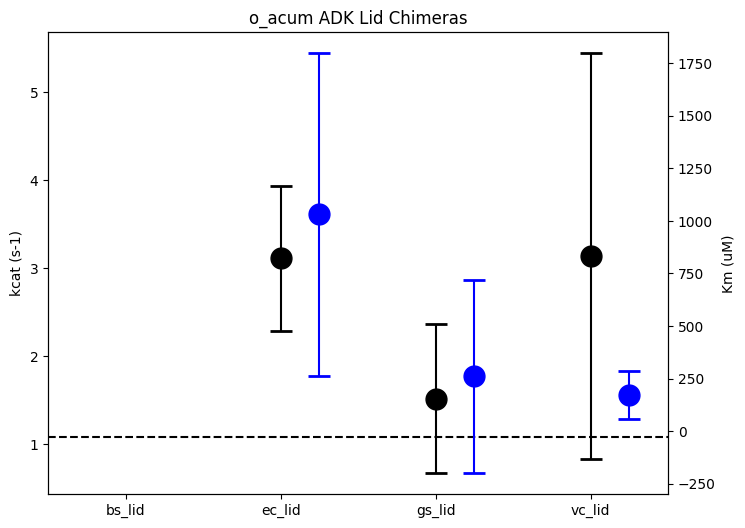

In [101]:
# same as above but twin x axis with Km
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
x_pos = np.arange(len(o_acum_subset[o_acum_subset["lid_name"] != "WT"]))
for i, row in o_acum_subset[o_acum_subset["lid_name"] != "WT"].iterrows():
    ax1.errorbar(x_pos[i], row[y_key], yerr=row[y_err_key], fmt='o', color='black', capsize=8, capthick=2, markersize=15)
    ax2.errorbar(x_pos[i]+0.25, row["Km_mean_filtered"], yerr=row["Km_stdev_filtered"], fmt='o', color='blue', capsize=8, capthick=2, markersize=15)
    
ax1.axhline(y=1.08, # slowest measured wt kcat
            color='black', linestyle='--')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(o_acum_subset[o_acum_subset["lid_name"] != "WT"]["lid_name"])
ax1.set_ylabel("kcat (s-1)")
ax2.set_ylabel("Km (uM)")
ax1.set_title("o_acum ADK Lid Chimeras")
ax1.set_xlim(-0.5, len(x_pos)-0.5)

plt.rcParams['pdf.fonttype'] = 42

plt.savefig("../data/fig_pdfs/o_acum_chimera_kcat_km.pdf")


## Fig 6D
___

In [58]:
d_dese_subset = chimera_consensus[chimera_consensus["id"].str.contains("d_dese")].copy().reset_index(drop=True)

d_dese_subset["lid_name"] = d_dese_subset["id"].str[-6:]
# set rows to nan if Km_mean_filtered is < 35 or > 2000
d_dese_subset.loc[d_dese_subset["Km_mean_filtered"] < 35, ["kcat_mean_normed","Km_mean_filtered"]] = np.nan

d_dese_subset.loc[d_dese_subset["Km_mean_filtered"] > 2000, ["kcat_mean_normed","Km_mean_filtered"]] = np.nan

# set lid_name for D_dese_WT to WT
d_dese_subset.loc[d_dese_subset["id"] == "d_dese_wt", "lid_name"] = "WT"



In [59]:
d_dese_subset

,id,sample_name,assay_type,replicates,kcat_mean_filtered,kcat_stdev_filtered,Km_mean_filtered,Km_stdev_filtered,kcat_mean_normed,kcat_stdev_normed,lid_name
0,d_dese_adk_bs_lid,d_dese_ADK_bs_lid,mm_filtered,8,309.477997,53.537735,97.476118,22.971957,27.626681,4.779241,bs_lid
1,d_dese_adk_ec_lid,d_dese_ADK_ec_lid,mm_filtered,8,63.775486,10.428559,NaN,11.882145,NaN,0.930943,ec_lid
2,d_dese_adk_gs_lid,d_dese_ADK_gs_lid,mm_filtered,7,138.525296,21.569932,41.432234,10.644003,12.365965,1.925519,gs_lid
3,d_dese_adk_vc_lid,d_dese_ADK_vc_lid,mm_filtered,8,342.372455,21.427910,157.857315,13.140087,30.563124,1.912840,vc_lid
4,d_dese_wt,D_dese_WT,mm_filtered,9,1113.241256,128.698191,264.064599,16.608614,99.377536,11.488713,WT


In [60]:
d_dese_subset["kcat_km_mean"] = d_dese_subset["kcat_mean_normed"] / (d_dese_subset["Km_mean_filtered"] * 1e-6)
# propogate error
d_dese_subset["kcat_km_stdev"] = d_dese_subset["kcat_km_mean"] * np.sqrt((d_dese_subset["kcat_stdev_normed"]/d_dese_subset["kcat_mean_filtered"])**2 + (d_dese_subset["Km_stdev_filtered"]/d_dese_subset["Km_mean_filtered"])**2)
d_dese_subset


,id,sample_name,assay_type,replicates,kcat_mean_filtered,kcat_stdev_filtered,Km_mean_filtered,Km_stdev_filtered,kcat_mean_normed,kcat_stdev_normed,lid_name,kcat_km_mean,kcat_km_stdev
0,d_dese_adk_bs_lid,d_dese_ADK_bs_lid,mm_filtered,8,309.477997,53.537735,97.476118,22.971957,27.626681,4.779241,bs_lid,283419.995705,66936.141834
1,d_dese_adk_ec_lid,d_dese_ADK_ec_lid,mm_filtered,8,63.775486,10.428559,NaN,11.882145,NaN,0.930943,ec_lid,NaN,NaN
2,d_dese_adk_gs_lid,d_dese_ADK_gs_lid,mm_filtered,7,138.525296,21.569932,41.432234,10.644003,12.365965,1.925519,gs_lid,298462.428048,76787.599944
3,d_dese_adk_vc_lid,d_dese_ADK_vc_lid,mm_filtered,8,342.372455,21.427910,157.857315,13.140087,30.563124,1.912840,vc_lid,193612.341579,16152.606115
4,d_dese_wt,D_dese_WT,mm_filtered,9,1113.241256,128.698191,264.064599,16.608614,99.377536,11.488713,WT,376337.973894,23986.679291


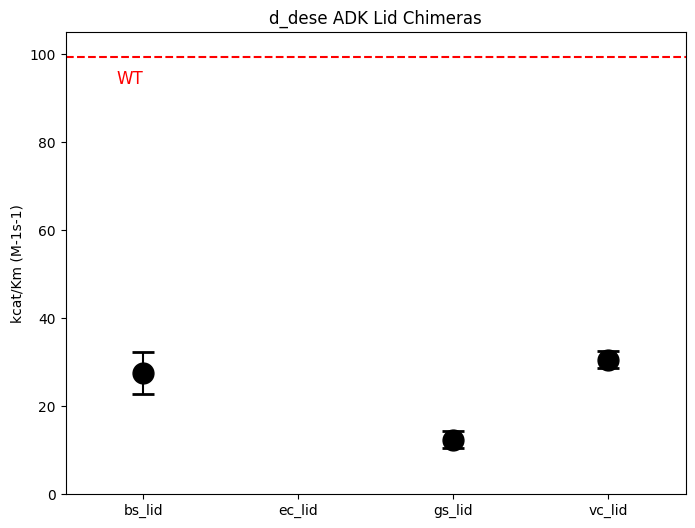

In [88]:
# d_dese plot
y_key = "kcat_mean_normed"
y_err_key = "kcat_stdev_normed"

fig, ax = plt.subplots(figsize=(8, 6))
x_pos = np.arange(len(d_dese_subset[d_dese_subset["lid_name"] != "WT"]))
for i, row in d_dese_subset[d_dese_subset["lid_name"] != "WT"].iterrows():

    ax.errorbar(x_pos[i], row[y_key], yerr=row[y_err_key], fmt='o', color='black', capsize=8, capthick=2, markersize=15)
ax.axhline(y=d_dese_subset[d_dese_subset["lid_name"] == "WT"][y_key].values[0], color='r', linestyle='--')
ax.text(0, d_dese_subset[d_dese_subset["lid_name"] == "WT"][y_key].values[0]- 5, "WT", color='r', fontsize=12, ha='right', va='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(d_dese_subset[d_dese_subset["lid_name"] != "WT"]["lid_name"])
ax.set_ylabel("kcat/Km (M-1s-1)")
ax.set_title("d_dese ADK Lid Chimeras")
ax.set_ylim(0, 105)
ax.set_xlim(-0.5, len(x_pos)-0.5)
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/d_dese_chimera.pdf")

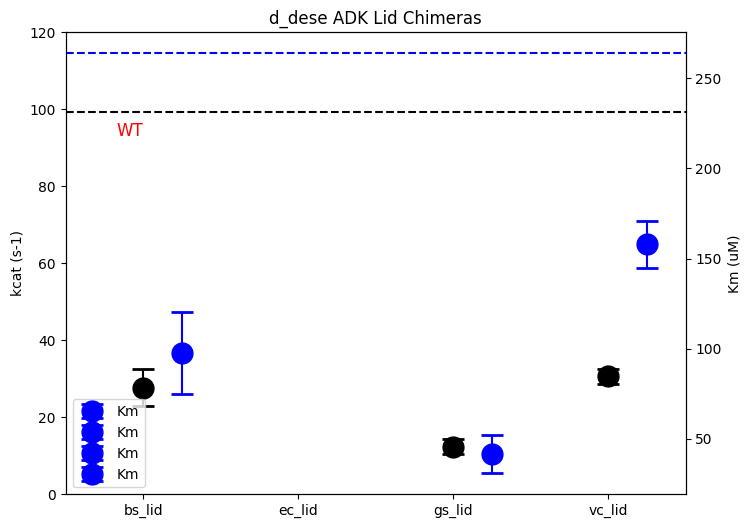

In [102]:
# same as above but twin x axis with Km
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
x_pos = np.arange(len(d_dese_subset[d_dese_subset["lid_name"] != "WT"]))
for i, row in d_dese_subset[d_dese_subset["lid_name"] != "WT"].iterrows():
    ax1.errorbar(x_pos[i], row[y_key], yerr=row[y_err_key], fmt='o', color='black', capsize=8, capthick=2, markersize=15, label='kcat')
    ax2.errorbar(x_pos[i]+0.25, row["Km_mean_filtered"], yerr=row["Km_stdev_filtered"], fmt='o', color='blue', capsize=8, capthick=2, markersize=15, label='Km')

ax1.axhline(y=d_dese_subset[d_dese_subset["lid_name"] == "WT"][y_key].values[0], color='black', linestyle='--')
ax2.axhline(y=d_dese_subset[d_dese_subset["lid_name"] == "WT"]["Km_mean_filtered"].values[0], color='blue', linestyle='--')
ax1.text(0, d_dese_subset[d_dese_subset["lid_name"] == "WT"][y_key].values[0]- 5, "WT", color='r', fontsize=12, ha='right', va='center')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(d_dese_subset[d_dese_subset["lid_name"] != "WT"]["lid_name"])
ax1.set_ylabel("kcat (s-1)")
ax2.set_ylabel("Km (uM)")
ax1.set_title("d_dese ADK Lid Chimeras")
ax1.set_ylim(0, 120)
ax1.set_xlim(-0.5, len(x_pos)-0.5)
plt.legend()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/d_dese_chimera_kcat_km.pdf")


## Fig 6E
___

In [20]:
consensus_subset = chimera_consensus[chimera_consensus["id"].str.contains("consensus")].copy()

consensus_adk_row = ["consensus_adk","consensus_adk", "mm_filtered", 5,	50.4547036,	11.0627375,	803.86496,	423.140814,	5.389257151, 1.181652709]
# append a new row for consensus_adk
consensus_subset.loc[len(consensus_subset.index)] = consensus_adk_row

# add a row for lidless_consensus 
lidless_consensus_row = ["lidless_consensus", "lidless_consensus", np.nan, np.nan, np.nan, np.nan, 0, np. nan, 0,np.nan]
consensus_subset.loc[len(consensus_subset.index)] = lidless_consensus_row

consensus_subset.set_index("id", inplace=True)
consensus_subset = consensus_subset.loc[[ "consensus_adk", "lidless_consensus", "hbond_consensus", "zinc_consensus"]]
consensus_subset.reset_index(inplace=True)

In [23]:
consensus_subset

,id,sample_name,assay_type,replicates,kcat_mean_filtered,kcat_stdev_filtered,Km_mean_filtered,Km_stdev_filtered,kcat_mean_normed,kcat_stdev_normed
0,consensus_adk,consensus_adk,mm_filtered,5.0,50.454704,11.062738,803.864960,423.140814,5.389257,1.181653
1,lidless_consensus,lidless_consensus,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN
2,hbond_consensus,hbond_consensus,mm_filtered,10.0,2864.953563,304.524033,1174.068258,73.729321,255.750517,27.184447
3,zinc_consensus,zinc_consensus,mm_filtered,8.0,101.091246,13.678164,277.674066,91.708711,9.024278,1.221031


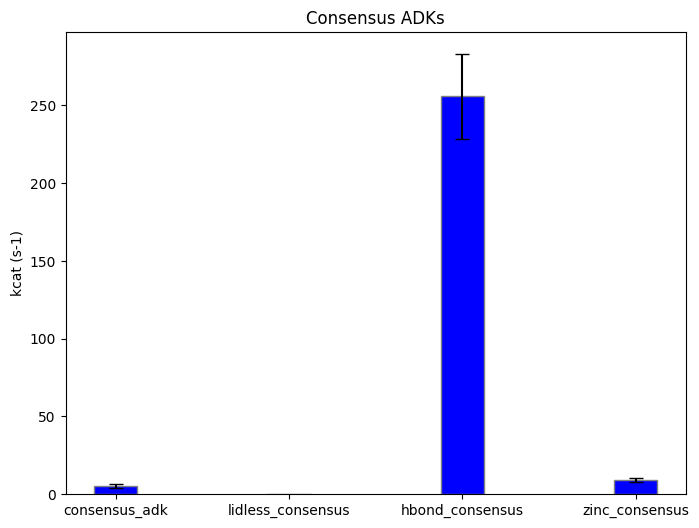

In [82]:
# barplot of consensus
fig, ax = plt.subplots(figsize=(8, 6))
barWidth = 0.25
x_pos = np.arange(len(consensus_subset["id"]))
ax.bar(x_pos, consensus_subset["kcat_mean_normed"],
       # error bars
        yerr=consensus_subset["kcat_stdev_normed"],
        # set capsize
        capsize=5,
        color="b", width=barWidth, edgecolor='grey', label='kcat')

ax.set_xticks(x_pos)
ax.set_xticklabels(consensus_subset["id"])
ax.set_ylabel("kcat (s-1)")
ax.set_title("Consensus ADKs")
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/consensus_barchart.pdf")
plt.show()
